In [ ]:
!pip install roboflow

In [ ]:
!nvidia-smi

Thu May  9 11:02:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os

from google.colab import drive
drive.mount("/content/drive")

root_path = "/content/drive/MyDrive/visual_intelligence/"
os.chdir(root_path)

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="dDAyzjonPqKsjC7QnvFi")
# project = rf.workspace("haoxin-bi").project("augmented_gun")
# version = project.version(2)
# dataset = version.download("yolov8")

# AUGMENTED GUN - TRAIN 6 PREDICT 12

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# # this one for predict 5, average train3

# from roboflow import Roboflow
# rf = Roboflow(api_key="dDAyzjonPqKsjC7QnvFi")
# project = rf.workspace("sc19sjjd-leeds-ac-uk").project("gun-detection-cctv")
# version = project.version(8)
# dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# test next train4

# DONT RUN THIS ONE
# from roboflow import Roboflow
# rf = Roboflow(api_key="dDAyzjonPqKsjC7QnvFi")
# project = rf.workspace("sc19sjjd-leeds-ac-uk").project("gun-detection-cctv-br07f")
# version = project.version(1)
# dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gun-Detection-CCTV-1 in yolov8:: 100%|██████████| 8884/8884 [01:14<00:00, 119.10it/s]


In [ ]:
# train5

from roboflow import Roboflow
rf = Roboflow(api_key="dDAyzjonPqKsjC7QnvFi")
project = rf.workspace("mcd-fz7gc").project("gundetectionmcd")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/visual_intelligence/GunDetectionMCD-9/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_wid

In [ ]:
!yolo task=detect mode=val model=runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/visual_intelligence/gun-detection-cctv-8/valid/labels.cache... 480 images, 3 backgrounds, 0 corrupt: 100% 480/480 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:16<00:00,  1.85it/s]
                   all        480        538      0.892      0.739      0.858      0.512
               Handgun        480        538      0.892      0.739      0.858      0.512
Speed: 3.4ms preprocess, 13.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val7
💡 Learn mo

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/visual_intelligence/augmented_gun-2/test/images/196_png.rf.00c1008a822c8f2eb7b4979b739e2af2.jpg: 800x800 4 handguns, 22.6ms
Speed: 5.9ms preprocess, 22.6ms inference, 517.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict11
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
model = project.version(dataset.version).model

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import os

video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)

frame_dir = 'video_frames'
os.makedirs(frame_dir, exist_ok=True)

count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_filename = os.path.join(frame_dir, f'frame_{count:04d}.png')
    cv2.imwrite(frame_filename, frame)
    count += 1

cap.release()
print(f"All frames are extracted and saved in {frame_dir}/")


All frames are extracted and saved in video_frames/


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train9/weights/best.pt conf=0.4 source="video.mp4" save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 86.7ms
video 1/1 (2/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.6ms
video 1/1 (3/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.5ms
video 1/1 (4/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.5ms
video 1/1 (5/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.7ms
video 1/1 (6/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.6ms
video 1/1 (7/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections), 15.6ms
video 1/1 (8/1631) /content/drive/MyDrive/visual_intelligence/video.mp4: 480x800 (no detections

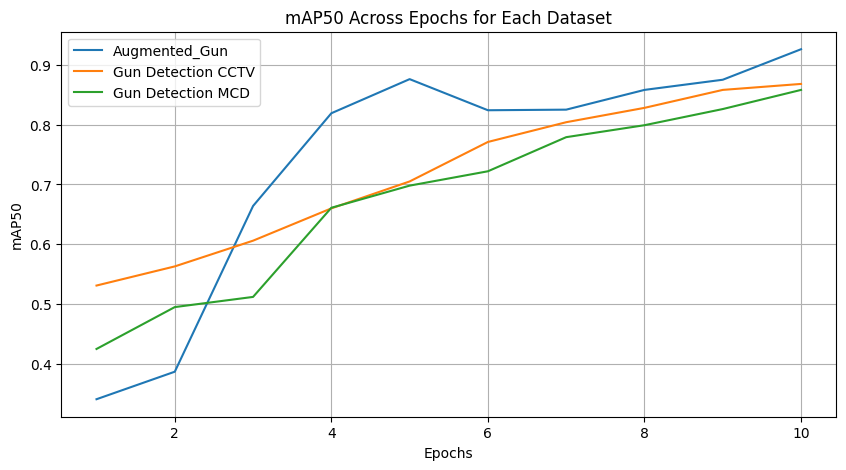

In [ ]:
import matplotlib.pyplot as plt

# Sample data (fill in actual data)
epochs = range(1, 11)
map50_d1 = [0.341, 0.387, 0.664, 0.819, 0.876, 0.824, 0.825, 0.858, 0.875, 0.926]
map50_d2 = [0.531, 0.563, 0.606, 0.660, 0.705, 0.771, 0.804, 0.828, 0.858, 0.868]
map50_d3 = [0.425, 0.495, 0.512, 0.661, 0.698, 0.722, 0.779, 0.799, 0.826, 0.858]

# Plotting mAP50 for each dataset
plt.figure(figsize=(10, 5))
plt.plot(epochs, map50_d1, label='Augmented_Gun')
plt.plot(epochs, map50_d2, label='Gun Detection CCTV')
plt.plot(epochs, map50_d3, label='Gun Detection MCD')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 Across Epochs for Each Dataset')
plt.legend()
plt.grid(True)
plt.show()
